In [2]:
import os
import sys
#SERVE PER POTER IMPORTARE I FILE .PY DALLA CARTELLA SOURCE
sys.path.append('..')
sys.path.append('..\data')
sys.path.append('..\src')
# importo i miei script dal package src
from data_load_notebook  import *
#import pandas as pd|
# ||||||||||è un utilizzo un pò improprio di import, basta ricordare che così importiamo pandas
from classes import Spettri,plot_peaks, plot_spettri, plot_database_peaks
import funzioni
import cluster_routine
import numpy as np

from numpy.random import choice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pass

## Database

Utilizzo una routine diversa dai campioni, per la diversità di come arrivano i dati 8 e perchè è un processo da svolgersi su questo database e basta.

Nel modulo data_load_... esiste una variabile chiamata database con un dizionario con key = nome materiale e value = dataf due colonne con numero d onda ed intensità


In [4]:
#routine per estrarre i picchi e le feature dai csampioni
pk1 = Spettri(data1)
pk1bkg = Spettri(data1bkg)
pk1.peakfinder()
pk1bkg.peakfinder()
pk1.featextract()
pk1bkg.featextract()
pk1.featextract2()
pk1bkg.featextract2()
pass

In [5]:
pk1.data.shape

(2699, 122)

### Funzioni in funzioni.

Sono simili ad i metodi applicati alla classe spettri
- **seriepeak**: per la singola serie (singolo ingresso di database)
- **peakfinder** : wrapper per seriepeak
- **featextract1_df** : per l'estrazione delle feature direttamente dal risultato di peakfinder
- **featextract1** : alternativa alla precedente da utilizzare con una lista di picchi passando a parte il valore delle chiavi (nomi dei materiali)

Queste funzioni accettano parametri per riprodurre il comportameto dei metodi della classe Spettri

come funzione peakfinder bene o male
crea un dizionario con key-val nome materiale_dataframepicchi_raw dalla variabile DATABASE

    dtbase_peaks = dict()
    for key,val in database.items():
        funzioni.normalizer(val['H'],val['K'])
         dtbase_peaks[key] = funzioni.seriepeak(val['H'],prop={'prominence':(None,None), 'height': (None,None), 'width':(None),'wlen':150})
    dtbase_peaks[key]['K']= val.loc[dtbase_peaks[key]['peak_ind_H'],'K'].values
    dtbase_peaks[key].drop('peak_ind_H', axis = 1, inplace = True)

In [9]:
picchidf = funzioni.peakfinder(database)
database_feat1 = funzioni.featextract1_df(picchidf)
database_feat2 = funzioni.featextract2_df(picchidf)
for key in database.keys():
    
    print(database[key].shape[0])

2427
2401
2477
2424
2399
2386
2299
2435
2459
2441
2202
2392
2200
2343
2405
2427
2397
2406
2421
2383
2431
2413
2428
2329
2323
2358
2403
2367
2479
2439
2291
2447
2442
2325
2430
2432
2332
2446
2384
2409
2448
2392
1073
2334
2402
2487
2387
351
2381
2383
2377
2360
2444
2354
2345
2400
2392
2399
2386
2392
2398


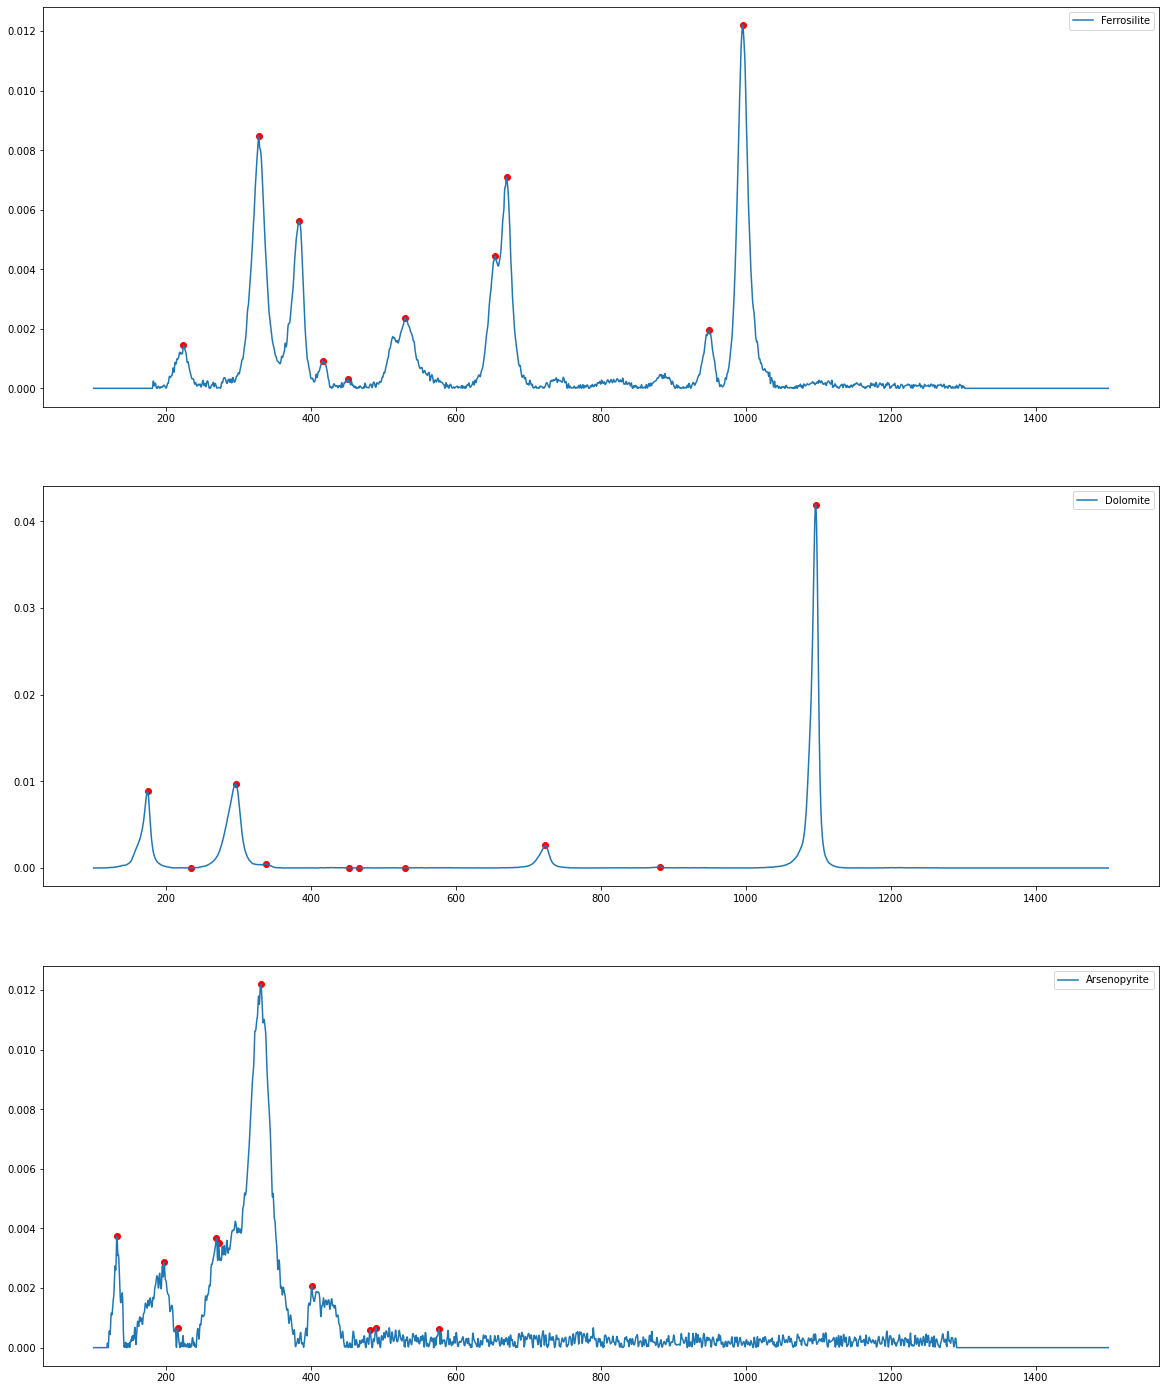

In [6]:
plot_database_peaks(database,picchidf)

1395.99579607754